# Configuração Ambiente

In [ ]:
!python --version
!pip --version
#!pip install lark-parser
#!pip list | grep -i graph

Python 3.12.12
pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)


In [ ]:
from lark import Lark

# Funções Auxiliares

In [ ]:
from IPython.display import Image
from lark import Tree, Token
import graphviz

In [ ]:
def ASTToImg(node):
  lines = ['digraph AST {']
  seen = set()

  def walk(n):
    if n is None or id(n) in seen:
      return
    nid = f'n{id(n)}'
    seen.add(id(n))

    # Extract VALUE, not Token object
    if hasattr(n, 'value'):
      label = n.value
    elif hasattr(n, 'name'):
      label = n.name
    elif hasattr(n, 'data'):
      label = n.data
    elif hasattr(n, 'label'):
      label = n.label
    else:
      label = f"{type(n).__name__}:{repr(n)}"

    # Escape for DOT
    label = (str(label)
             .replace('\\', '\\\\')
             .replace('"', '\\"')
             .replace('\n', '\\l'))

    lines.append(f'  "{nid}" [label="{label}"];')

    # Children
    children = (getattr(n, 'children', None) or
                getattr(n, 'child', None) or
                getattr(n, 'nodes', None) or
                getattr(n, 'args', None) or [])

    for c in children:
      if c is not None:
        cid = f'n{id(c)}'
        lines.append(f'  "{nid}" -> "{cid}";')
        walk(c)

  walk(node)
  lines.append('}')
  dSrc = '\n'.join(lines)

  dg = graphviz.Source(dSrc)
  return Image(dg.render('a', format='png', cleanup=True))

# Gramática

In [ ]:
#Gramática
G_Calc = """
?start: sum
      | NAME "=" sum    -> assign_var

?sum: product
    | sum "+" product   -> add
    | sum "-" product   -> sub

?product: expo
    | product "*" expo  -> mul
    | product "/" expo  -> div

?expo: atom
    | atom "^" expo     -> pot

?atom: NUMBER           -> number
     | "-" atom         -> neg
     | NAME             -> var
     | "(" sum ")"

%import common.CNAME -> NAME
%import common.NUMBER
%import common.WS_INLINE
%ignore WS_INLINE
"""
parser = Lark(G_Calc)

## Visualização da AST

In [ ]:
text = '2+1/3^2'
print("Implementação realizada por:\nAdriel Ravi\nCaio Eduardo\nPedro Henrique\n")
AST = parser.parse(text)
print(AST)
print()
print(AST.pretty())

Implementação realizada por:
Adriel Ravi
Caio Eduardo
Pedro Henrique

Tree('add', [Tree('number', [Token('NUMBER', '2')]), Tree('div', [Tree('number', [Token('NUMBER', '1')]), Tree('pot', [Tree('number', [Token('NUMBER', '3')]), Tree('number', [Token('NUMBER', '2')])])])])

add
  number	2
  div
    number	1
    pot
      number	3
      number	2



Implementação realizada por:
Adriel Ravi
Caio Eduardo
Pedro Henrique

Tree('add', [Tree('number', [Token('NUMBER', '2')]), Tree('div', [Tree('number', [Token('NUMBER', '1')]), Tree('pot', [Tree('number', [Token('NUMBER', '3')]), Tree('number', [Token('NUMBER', '2')])])])])



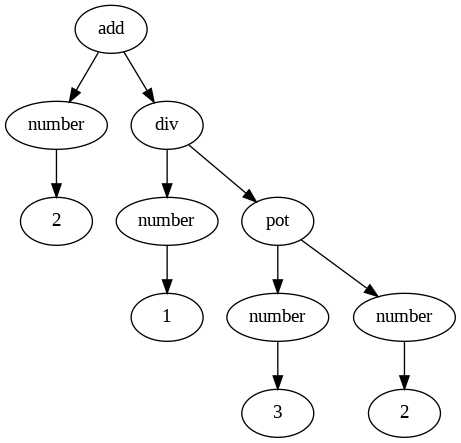

In [ ]:
text = '2+1/3^2'
print("Implementação realizada por:\nAdriel Ravi\nCaio Eduardo\nPedro Henrique\n")
AST = parser.parse(text)
print(AST)
print()
ASTToImg(AST)